## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing The Dataset

In [2]:
url = "datasets/winconsin_data.csv"
data = pd.read_csv(url)

## Pre-processing Dataset

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data = data.drop(columns=['id'], axis=1)
data = data.drop(columns=['Unnamed: 32'], axis=1)

In [6]:
print(data.isna().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
print("Duplicae Data: ", data.duplicated().sum())

Duplicae Data:  0


In [8]:
data['diagnosis'] = data['diagnosis'].map({'B': False, 'M': True})

In [9]:
data = data.astype(float)

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Splitting The Dataset (Base)

In [12]:
x = data.drop(columns=['diagnosis'], axis=1).values
y = data['diagnosis'].values
y = y.astype(int) 

In [13]:
print("Type of x:", type(x))
print("Shape of x:", x.shape)
print("Data type of x elements:", x.dtype)
print("First 5 elements of x:\n", x[:5])

Type of x: <class 'numpy.ndarray'>
Shape of x: (569, 30)
Data type of x elements: float64
First 5 elements of x:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e

In [14]:
print("Type of y:", type(y))
print("Shape of y:", y.shape)
print("Data type of y elements:", y.dtype)
print("First 5 elements of y:\n", y[:5])

Type of y: <class 'numpy.ndarray'>
Shape of y: (569,)
Data type of y elements: int32
First 5 elements of y:
 [1 1 1 1 1]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [17]:
print("\nX_train sample:")
print(X_train[:1])
print("\nX_test sample:")
print(X_test[:1])
print("\ny_train sample:")
print(y_train[:1])
print("\ny_test sample:")
print(y_test[:1])


X_train sample:
[[9.029e+00 1.733e+01 5.879e+01 2.505e+02 1.066e-01 1.413e-01 3.130e-01
  4.375e-02 2.111e-01 8.046e-02 3.274e-01 1.194e+00 1.885e+00 1.767e+01
  9.549e-03 8.606e-02 3.038e-01 3.322e-02 4.197e-02 9.559e-03 1.031e+01
  2.265e+01 6.550e+01 3.247e+02 1.482e-01 4.365e-01 1.252e+00 1.750e-01
  4.228e-01 1.175e-01]]

X_test sample:
[[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
  3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
  6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
  2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
  3.014e-01 8.750e-02]]

y_train sample:
[0]

y_test sample:
[0]


## Train XGBoost Model On Base Dataset

In [42]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
print(f'Best XGB parameters: {best_params_xgb}')

Best XGB parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


In [19]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Base Model Evaluation (XGBoost)

In [20]:
y_pred = xgb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1-score: 0.95


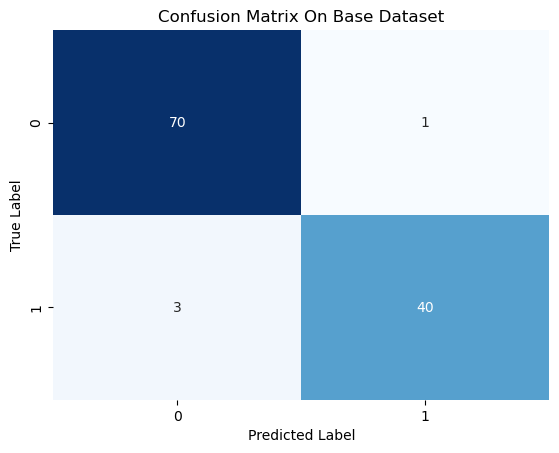

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix On Base Dataset')
plt.show()

## Scaling The Dataset

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

In [22]:
print("\nfeatures_scaled sample:")
print(features_scaled[:1])
print("\ny sample:")
print(y[:1])


features_scaled sample:
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]

y sample:
[1]


## PCA

In [23]:
print("Features scaled shape:", features_scaled.shape)
print("Target shape:", y.shape)
print("Any NaN in features scaled:", np.isnan(features_scaled).any())
print("Any NaN in target:", np.isnan(y).any())

Features scaled shape: (569, 30)
Target shape: (569,)
Any NaN in features scaled: False
Any NaN in target: False


In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

# Definisikan pipeline dengan PCA dan XGBoost
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('xgb', xgb_model)
])

# Definisikan parameter grid untuk PCA
param_grid_pca = {
    'pca__n_components': [2, 4, 6, 8, 10, 12, 14, 16]
}

# Lakukan Grid Search dengan pipeline
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5)
grid_search_pca.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_pca = grid_search_pca.best_params_
print(f'Best PCA parameters: {best_params_pca}')

Best PCA parameters: {'pca__n_components': 14}


In [28]:
from sklearn.decomposition import PCA

# Inisialisasi dan transformasi dengan PCA
pca_model = PCA(n_components=14)
features_reduced_pca = pca_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'PCA reduced shape: {features_reduced_pca.shape}')

Original shape: (569, 30)
PCA reduced shape: (569, 14)


## Splitting The Dataset (After Feature Reduced With PCA)

In [29]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(features_reduced_pca, y, test_size=0.2, random_state=42)

In [30]:
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (455, 14)
X_pca_test shape: (114, 14)
y_pca_train shape: (455,)
y_pca_test shape: (114,)


In [31]:
print("\nX_pca_train sample:")
print(X_pca_train[:1])
print("\nX_pca_test sample:")
print(X_pca_test[:1])
print("\ny_pca_train sample:")
print(y_pca_train[:1])
print("\ny_pca_test sample:")
print(y_pca_test[:1])


X_pca_train sample:
[[ 4.33000265  9.20252569  1.49296283 -0.3199473  -4.72817055  2.21576431
  -2.58106006  1.29915301  3.78411857 -2.73815837  2.30394216 -1.94959514
  -1.10465056  0.24528741]]

X_pca_test sample:
[[-0.78118997  0.65284926 -0.643657   -0.21446824  0.4376799  -0.16048949
   0.18723511 -0.06818966  0.53375804  0.18956175  0.08623605  0.05292868
  -0.07532601  0.01061286]]

y_pca_train sample:
[0]

y_pca_test sample:
[0]


## Train The Model (After Feature Reduced With PCA) 

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_pca = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_pca.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pca_pred = xgb_model_pca.predict(X_pca_test) 
accuracy = accuracy_score(y_pca_test, y_pca_pred)
precision = precision_score(y_pca_test, y_pca_pred)
recall = recall_score(y_pca_test, y_pca_pred)
f1 = f1_score(y_pca_test, y_pca_pred)

print('XGBoost Model Performance On PCA Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1-score: 0.96


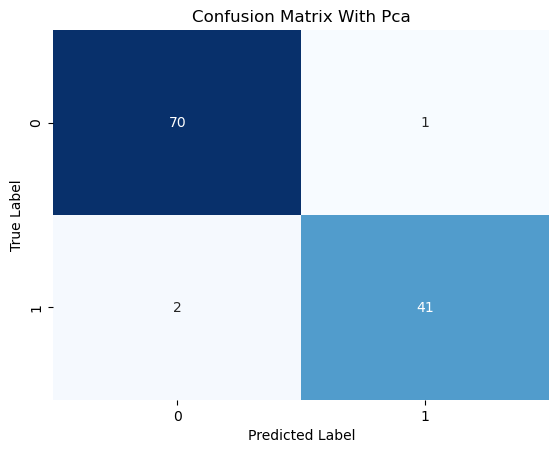

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_pca_test, y_pca_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix With Pca')
plt.show()

## UMAP

In [53]:
features_scaled_noisy = features_scaled + np.random.normal(0, 0.01, features_scaled.shape)

In [67]:
import umap.umap_ as umap
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

# Definisikan pipeline dengan UMAP dan XGBoost
pipeline_umap = Pipeline([
    ('umap', umap.UMAP()),
    ('xgb', xgb_model)
])

# Definisikan parameter grid untuk UMAP dan XGBoost
param_grid_umap = {
    'umap__n_neighbors': [5, 10, 15, 20],
    'umap__n_components': [5, 12, 14, 16],
    'umap__min_dist': [0.1, 0.3, 0.5],
    'umap__metric': ['euclidean', 'manhattan'],
    'umap__n_epochs': [200, 400],
    'umap__init': ['random']  
}

# Lakukan Grid Search dengan pipeline
grid_search_umap = GridSearchCV(pipeline_umap, param_grid_umap, cv=5)
grid_search_umap.fit(features_scaled, y)
# grid_search_umap.fit(features_scaled_noisy, y)

# Dapatkan parameter terbaik
best_params_umap = grid_search_umap.best_params_
print(f'Best UMAP parameters: {best_params_umap}')

c:\Users\albia\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best UMAP parameters: {'umap__init': 'random', 'umap__metric': 'euclidean', 'umap__min_dist': 0.3, 'umap__n_components': 16, 'umap__n_epochs': 400, 'umap__n_neighbors': 5}


In [68]:
import umap.umap_ as umap

# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=5,
    n_components=16,
    n_epochs=400,
    min_dist=0.3,
    metric='euclidean',
    init='random'
)
features_reduced_umap = umap_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

Original shape: (569, 30)
UMAP reduced shape: (569, 16)


## Splitting The Dataset (After Feature Reduced With UMAP)

In [69]:
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(features_reduced_umap, y, test_size=0.2, random_state=42)

In [70]:
print("X_umap_train shape:", X_umap_train.shape)
print("X_umap_test shape:", X_umap_test.shape)
print("y_umap_train shape:", y_umap_train.shape)
print("y_umap_test shape:", y_umap_test.shape)

X_umap_train shape: (455, 16)
X_umap_test shape: (114, 16)
y_umap_train shape: (455,)
y_umap_test shape: (114,)


In [71]:
print("\nX_umap_train sample:")
print(X_umap_train[:1])
print("\nX_umap_test sample:")
print(X_umap_test[:1])
print("\ny_umap_train sample:")
print(y_umap_train[:1])
print("\ny_umap_test sample:")
print(y_umap_test[:1])


X_umap_train sample:
[[4.181215  4.6007557 5.0118227 4.797057  6.091749  5.2355266 2.9673455
  5.427006  5.1061697 5.2356644 3.7200098 3.8257892 4.56643   7.5334234
  4.686361  4.9596176]]

X_umap_test sample:
[[5.688108  3.8554711 4.48921   5.716365  5.006072  4.63173   4.679535
  4.725954  5.2022185 5.4830904 5.470822  4.9934897 4.239848  5.4961553
  5.135199  4.7452006]]

y_umap_train sample:
[0]

y_umap_test sample:
[0]


## Train The Model (After Feature Reduced With UMAP) 

In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_umap = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_umap.fit(X_umap_train, y_umap_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [73]:
y_umap_pred = xgb_model_umap.predict(X_umap_test) 
accuracy = accuracy_score(y_umap_test, y_umap_pred)
precision = precision_score(y_umap_test, y_umap_pred)
recall = recall_score(y_umap_test, y_umap_pred)
f1 = f1_score(y_umap_test, y_umap_pred)

print('XGBoost Model Performance On UMAP Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On UMAP Reduced Dataset
Accuracy: 0.96
Precision: 0.95
Recall: 0.93
F1-score: 0.94


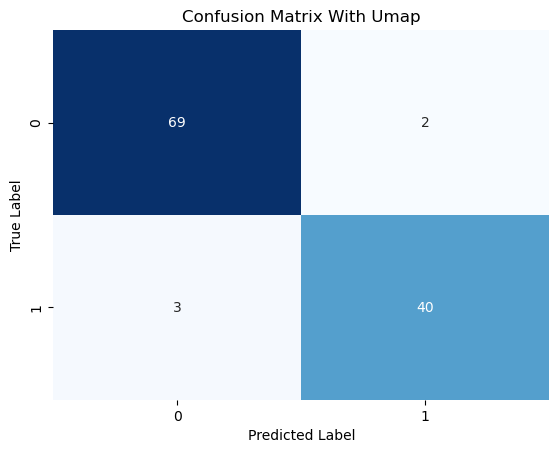

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_umap_test, y_umap_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix With Umap')
plt.show()
